In [3]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2023, day=25)

from collections import defaultdict

def parses(input):
    graph = defaultdict(list)
    for line in input.strip().split('\n'):
        node, *neighs = line.replace(':','').split()
        for neigh in neighs:
            graph[node].append(neigh)
    return dict(graph)

data = parses(puzzle.input_data)

In [4]:
sample = parses("""jqt: rhn xhk nvd
rsh: frs pzl lsr
xhk: hfx
cmg: qnr nvd lhk bvb
rhn: xhk bvb hfx
bvb: xhk hfx
pzl: lsr hfx nvd
qnr: nvd
ntq: jqt hfx bvb xhk
nvd: lhk
lsr: lhk
rzs: qnr cmg lsr rsh
frs: qnr lhk lsr""")

In [103]:
import networkx as nx

def build_nx_graph(graph):
    G = nx.Graph()
    for node, neighs in graph.items():
        for neigh in neighs:
            G.add_edge(node, neigh)
    # or just
    # G.add_edges_from(( (node, neigh) for node, neighs in graph.items() for neigh in neighs))
    return G

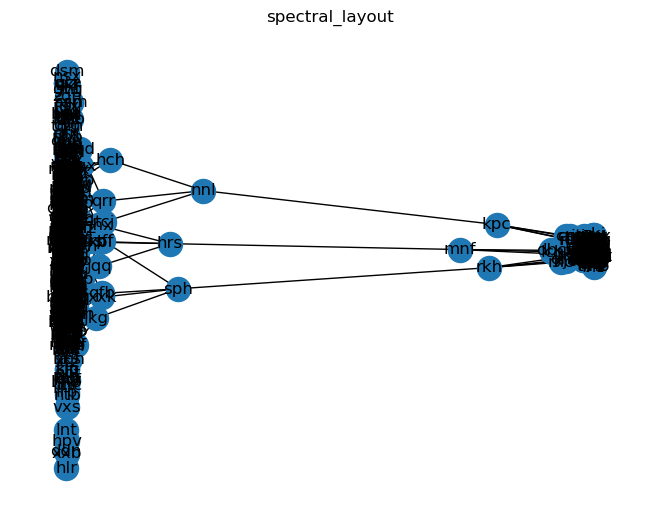

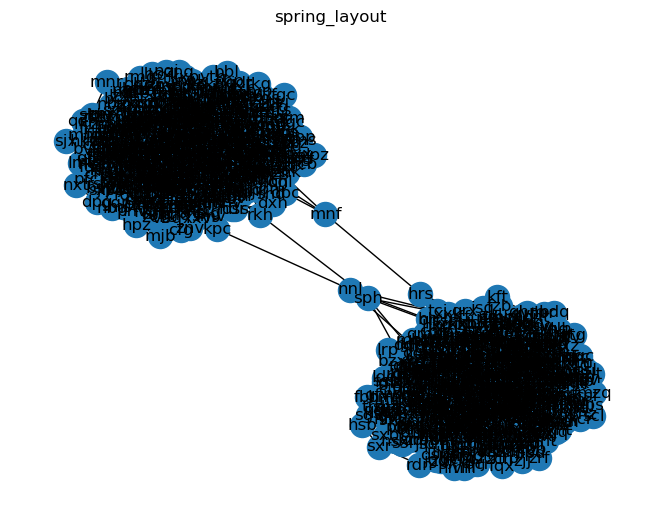

In [20]:
from functools import partial

G = build_nx_graph(data)
for layout in [
    nx.spectral_layout,
    nx.spring_layout,
]:
    pos = layout(G)
    nx.draw(G, pos=pos, with_labels=True)
    plt.title(layout.__name__)
    plt.show()

In [21]:
import math

In [22]:
def solve_stoer_wagner(data):
    G = build_nx_graph(data)
    cut, partitions = nx.stoer_wagner(G)
    assert cut == 3
    return math.prod(map(len, partitions))

In [23]:
solve_stoer_wagner(sample) == 54
solve_stoer_wagner(data)

614655

In [25]:
nx.minimum_edge_cut(G)

{('kpc', 'nnl'), ('mnf', 'hrs'), ('rkh', 'sph')}

In [113]:
import itertools
def solve_min_cut(data):
    G = build_nx_graph(data)
    for src, dst in G.edges():
        G[src][dst]['capacity'] = 1
    for src, dst in itertools.combinations(G, 2):
        cut, partitions = nx.minimum_cut(G, src, dst)
        if cut == 3:
            return math.prod(map(len, partitions))

In [ ]:
solve_min_cut2(sample) == 54

In [114]:
%%time
solve_min_cut(data)

CPU times: user 55.3 ms, sys: 5.77 ms, total: 61.1 ms
Wall time: 59.9 ms


614655

In [115]:
import itertools
def solve_min_cut2(data):
    G = build_nx_graph(data)
    G.remove_edges_from(nx.minimum_edge_cut(G))
    return math.prod(map(len, nx.connected_components(G)))
    for src, dst in itertools.combinations(G, 2):
        cut, partitions = nx.minimum_cut(G, src, dst)
        if cut == 3:
            return math.prod(map(len, partitions))

In [117]:
%%time
solve_min_cut2(data)

CPU times: user 1.69 s, sys: 15.2 ms, total: 1.71 s
Wall time: 1.72 s


614655

In [118]:
from collections import defaultdict
def build_undir_graph(data):
    graph = defaultdict(list)
    for node, neighs in data.items():
        for neigh in neighs:
            graph[node].append(neigh)
            graph[neigh].append(node)
    return dict(graph)

In [122]:
from collections import deque, Counter
import random
# fails for sample, works for data
def solve_random_paths(data):
    graph = build_undir_graph(data)
    
    # find shortest path between N random pairs, with high prob,
    # the min-cut edges will be the most commo
    n_iter = 300
    nodes = list(data)
    counter = Counter()
    for _ in range(n_iter):
        src, dst = random.choice(nodes), random.choice(nodes)
        queue = deque([src])
        visited = set()
        while queue:
            node = queue.popleft()
            for neigh in graph[node]:
                if neigh in visited: continue
                visited.add(neigh)
                queue.append(neigh)
                canon_edge = tuple(sorted([node,neigh]))
                counter[canon_edge] += 1
                
    # cut the graph
    cut = [edge for edge, _ in counter.most_common()[:3]]
    for src, dst in cut + [(dst, src) for src, dst in cut]:
        graph[src] = [node for node in graph[src] if node != dst]
    
    # connected components with the cut
    visited = set()
    components = []
    for node in graph:
        if node in visited: continue
        stack = [node]
        size = 1
        visited.add(node)
        while stack:
            node = stack.pop()
            for neigh in graph[node]:
                if neigh in visited: continue
                visited.add(neigh)
                size += 1
                stack.append(neigh)
        components.append(size)
    return math.prod(components)       

In [123]:
solve_random_paths(sample) != 54 # expected to fail

True

In [124]:
solve_random_paths(data)

614655

In [135]:
np.linalg.norm(pos['msv']-pos['jvn'])

0.11837282556371728

In [150]:
def solve_spring(data):
    # Fruchterman-Reingold to find longest edges
    G = build_nx_graph(data)
    pos = nx.spring_layout(G)
    edge_dist = {(src,dst): np.linalg.norm(pos[src]-pos[dst]) for src, dst in G.edges()}
    min_cut = sorted(edge_dist, key=edge_dist.__getitem__)[-3:]
    G.remove_edges_from(min_cut)
    return math.prod(map(len, nx.connected_components(G)))

In [151]:
solve_spring(sample)

54

In [153]:
%%time
solve_spring(data)

CPU times: user 3.41 s, sys: 3.19 ms, total: 3.42 s
Wall time: 3.45 s


614655

In [157]:
graph = build_undir_graph(data)

In [158]:
graph

{'msv': ['nlh', 'jvn', 'qbf', 'nks'],
 'nlh': ['msv', 'fkk', 'xqs', 'sqq', 'cgl', 'bsq'],
 'lsd': ['mfs', 'fpv', 'nlc', 'jjg', 'bbb', 'gmv'],
 'mfs': ['lsd', 'sqk', 'shr', 'rmb'],
 'fpv': ['lsd', 'jlk', 'zmb', 'lqp'],
 'nlc': ['lsd', 'lnp', 'xrm', 'zvl'],
 'jjg': ['lsd', 'dlk', 'dkm', 'fpj'],
 'bbb': ['lsd', 'scj', 'sld', 'nkf'],
 'gmv': ['lsd', 'xdc', 'dkc', 'fvm', 'hlx'],
 'lbf': ['dxk', 'xxm', 'jrj', 'kqj', 'mqb'],
 'dxk': ['lbf', 'nbz', 'zpj', 'mtc'],
 'jlf': ['rdb', 'rvx', 'rcl', 'bqc', 'pgm', 'mnz'],
 'rdb': ['jlf', 'jtm', 'gpj', 'fbl'],
 'rvx': ['jlf', 'pqq', 'jxn', 'rgm', 'xgh'],
 'rcl': ['jlf', 'pnd', 'ksm', 'xkk'],
 'bqc': ['jlf', 'mll', 'hsl', 'khs'],
 'fjk': ['hfb', 'tmh', 'vxz', 'lml', 'shx'],
 'hfb': ['fjk', 'cct', 'crj', 'zlp'],
 'tll': ['rqx', 'pms', 'szv', 'pns'],
 'rqx': ['tll', 'czh', 'kzx', 'nnk'],
 'pms': ['tll', 'mdj', 'nfj', 'crk'],
 'bbk': ['bst', 'zfs', 'dpb', 'dlq', 'fzn'],
 'bst': ['bbk', 'zzg', 'dkn', 'lft', 'cnz'],
 'zfs': ['bbk', 'dpk', 'bgl', 'ljk'],
 'dp

In [159]:
from collections import Counter

Counter({'nnl': 1, 'sph': 1, 'hrs': 1})


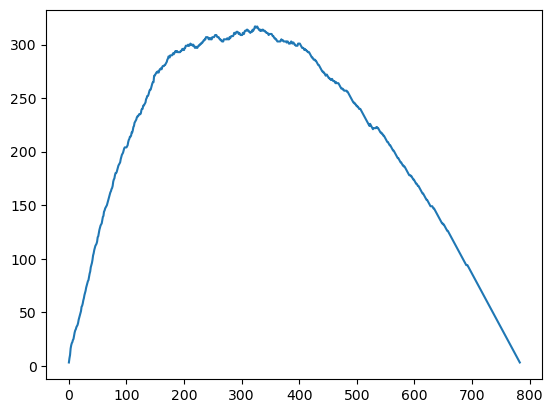

Counter({'hlr': 2, 'ddn': 2, 'lnt': 2})


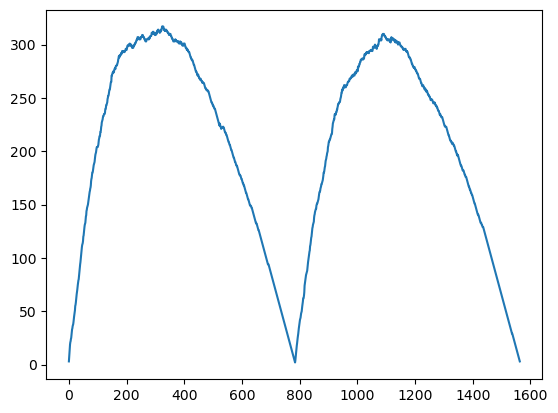

In [179]:
node = next(iter(graph))
visited = set([node])

counts = Counter()
C = []
while True:
    for neigh in graph[node]:
        if neigh not in visited:
            counts[neigh] += 1
    if len(counts) == 0:
        break
    if len(counts) == 3:
        print(counts)
        plt.plot(C)
        plt.show()
    node = counts.most_common()[0][0]
    del counts[node]
    visited.add(node)
    C.append(len(counts))

In [193]:
def solve_grow_frontier(data):
    graph = build_undir_graph(data)
    node = next(iter(graph))
    visited = set([node])

    counts = Counter()
    while True:
        for neigh in graph[node]:
            if neigh not in visited:
                counts[neigh] += 1
        if len(counts) == 3:
            # we are at the min cut
            break
        node = counts.most_common()[0][0]
        del counts[node]
        visited.add(node)

    n = len(visited)
    N = len(graph)
    return n * (N-n)

In [194]:
solve_grow_frontier(data)

614655

In [192]:
solve_min_cut(data)

614655

  0%|          | 0/100 [00:00<?, ?it/s]

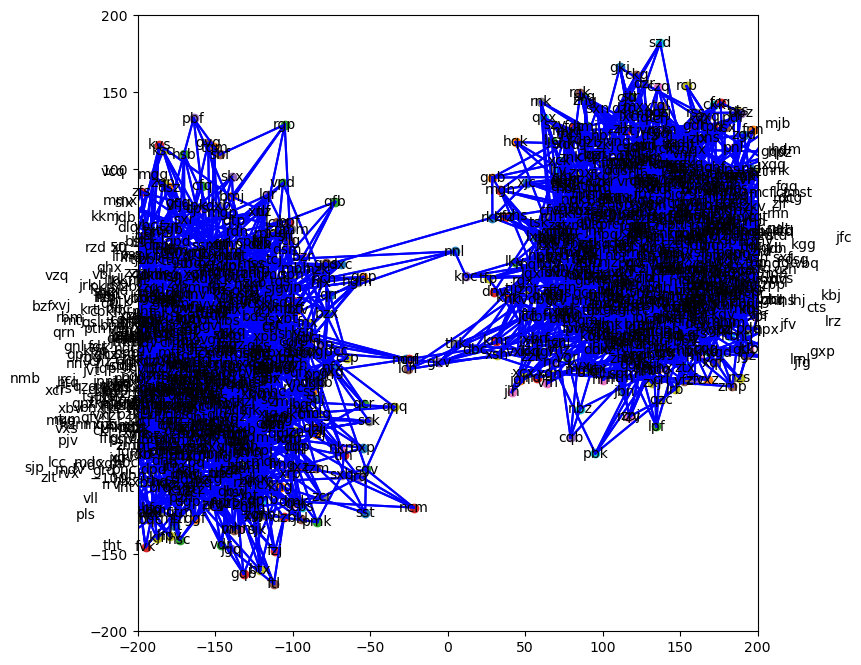

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

def fruchterman_reingold(graph: dict, iterations: int = 50, width: int = 400, height: int = 400):
    V = len(graph)
    area = width * height
    k = np.sqrt(area / V)

    # Random initial positions
    pos = {u: (np.random.rand(2) - 0.5) * width for u in graph}

    def repulsive_force(delta, k):
        return np.square(k) / delta

    def attractive_force(delta, k):
        return np.square(delta) / k

    for _ in tqdm(range(iterations)):
        # Calculate repulsive forces
        disp = {u: np.zeros(2) for u in graph}
        for u in graph:
            for v in graph:
                if u != v:
                    delta = pos[u] - pos[v]
                    distance = np.linalg.norm(delta)
                    disp[u] += (delta / distance) * repulsive_force(distance, k)

        # Calculate attractive forces
        for u in graph:
            for v in graph[u]:
                delta = pos[u] - pos[v]
                distance = np.linalg.norm(delta)
                force = (delta / distance) * attractive_force(distance, k)
                disp[u] -= force
                disp[v] += force

        # Limit the maximum displacement to the temperature t
        t = width / 10
        for u in graph:
            distance = np.linalg.norm(disp[u])
            pos[u] += (disp[u] / distance) * min(distance, t)

        # Cool down the temperature
        t *= 0.9

    return pos

# Example usage with a simple graph
graph = build_undir_graph(data)

width = 400
height = 400

positions = fruchterman_reingold(graph, width=width, height=height, iterations=100)

# Plotting the graph
plt.figure(figsize=(8, 8))
for node, (x, y) in positions.items():
    plt.scatter(x, y)
    plt.text(x, y, str(node), ha='center', va='center')

for node, neighbors in graph.items():
    for neighbor in neighbors:
        x0, y0 = positions[node]
        x1, y1 = positions[neighbor]
        plt.plot([x0, x1], [y0, y1], 'b-')

plt.xlim(-width / 2, width / 2)
plt.ylim(-height / 2, height / 2)
plt.show()
